# Hypothesis

## Hypothesis

H1: What is the relationship between SAT scores (total) and participation over the 3 years (2017–2019)?
H2: Among the 51 states n the USA, does the requirement for all students to take the SAT affect the scores compared to states where the test is not required?

## Import function & Data

Import data

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import data

In [63]:
sat_2017 = pd.read_csv('../data/project 1/sat_2017.csv')
sat_2018 = pd.read_csv('../data/project 1/sat_2018.csv')
sat_2019 = pd.read_csv('../data/project 1/sat_2019.csv')

# Cleaning Data

In [65]:
#Show the head of the DataFrame named 'sat_2017'.
sat_2017.head ()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [66]:
#Show the head of the DataFrame named 'sat_2018'.
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [67]:
#Show the head of the DataFrame named 'sat_2019'.
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [68]:
# After showing the head of the DataFrame named 'sat_2017-2019', 
# notice that the head of the DataFrame named 'sat_2019' is clear. 
# However, change the DataFrame's head column to ['State', 'Participation', 'EBRW', 'Math', 'Total'] 
# to make it consistent among the three.
sat_2019=sat_2019.rename(columns={"Participation Rate": "Participation", "Evidence-Based Reading and Writing":'EBRW'})
sat_2018=sat_2018.rename(columns={"Participation Rate": "Participation", "Evidence-Based Reading and Writing":'EBRW'})
sat_2017=sat_2017.rename(columns={"Participation Rate": "Participation", "Evidence-Based Reading and Writing":'EBRW'})
sat_2017.head(), sat_2018.head(), sat_2019.head()

(        State Participation  EBRW  Math  Total
 0     Alabama            5%   593   572   1165
 1      Alaska           38%   547   533   1080
 2     Arizona           30%   563   553   1116
 3    Arkansas            3%   614   594   1208
 4  California           53%   531   524   1055,
         State Participation  EBRW  Math  Total
 0     Alabama            6%   595   571   1166
 1      Alaska           43%   562   544   1106
 2     Arizona           29%   577   572   1149
 3    Arkansas            5%   592   576   1169
 4  California           60%   540   536   1076,
         State Participation  EBRW  Math  Total
 0     Alabama            7%   583   560   1143
 1      Alaska           41%   556   541   1097
 2     Arizona           31%   569   565   1134
 3    Arkansas            6%   582   559   1141
 4  California           63%   534   531   1065)

In [69]:
#Convert the header of the DataFrame to a string with all characters in lowercase.
sat_2017.columns = [x.lower() for x in sat_2017.columns]
sat_2018.columns = [x.lower() for x in sat_2018.columns]
sat_2019.columns = [x.lower() for x in sat_2019.columns]

In [70]:
#Search for a DataFrame object where all the values are replaced with a Boolean value: True for NULL values and False otherwise. 
#If there are NULL values in the DataFrame, sum them.
missing_2017 = sat_2017.isnull().sum()
missing_2017

state            0
participation    0
ebrw             0
math             0
total            0
dtype: int64

In [71]:
missing_2018 = sat_2018.isnull().sum()
missing_2018

state            0
participation    0
ebrw             0
math             0
total            0
dtype: int64

In [72]:
missing_2019 = sat_2019.isnull().sum()
missing_2019

state            0
participation    0
ebrw             0
math             0
total            0
dtype: int64

In [73]:
#Check the NumPy array for unique values in that column.
sat_2017['participation'].unique()

array(['5%', '38%', '30%', '3%', '53%', '11%', '100%', '83%', '61%',
       '55%', '93%', '9%', '63%', '2%', '4%', '95%', '69%', '76%', '10%',
       '26%', '96%', '70%', '67%', '49%', '12%', '7%', '43%', '65%',
       '71%', '50%', '62%', '60%', '64%', '14%'], dtype=object)

In [74]:
sat_2018['participation'].unique()

array(['6%', '43%', '29%', '5%', '60%', '100%', '92%', '56%', '70%',
       '99%', '63%', '3%', '4%', '76%', '80%', '10%', '23%', '96%', '82%',
       '16%', '79%', '52%', '2%', '8%', '18%', '48%', '97%', '55%', '66%',
       '64%', '68%', '69%', '28%'], dtype=object)

In [75]:
sat_2019['participation'].unique()

array(['7%', '41%', '31%', '6%', '63%', '100%', '94%', '71%', '54%',
       '66%', '3%', '4%', '5%', '99%', '82%', '81%', '9%', '20%', '95%',
       '18%', '79%', '51%', '2%', '19%', '22%', '70%', '—', '68%'],
      dtype=object)

In [76]:
#Check the DataFrame sat_2019['participation'] and notice the presence of '—', which cannot be used for data analysis. Remove this data.
sat_2019=sat_2019[sat_2019['participation'] != '—'].reset_index(drop=True)

In [77]:
#Show and check the DataFrame sat_2019['participation'] again.
sat_2019['participation'].unique()

array(['7%', '41%', '31%', '6%', '63%', '100%', '94%', '71%', '54%',
       '66%', '3%', '4%', '5%', '99%', '82%', '81%', '9%', '20%', '95%',
       '18%', '79%', '51%', '2%', '19%', '22%', '70%', '68%'],
      dtype=object)

In [78]:
#Create a function clean_participation to remove '%' from the DataFrame.
def clean_participation(rate):
    return float(rate.strip('%'))

In [79]:
#Use the clean_participation function and apply it to all DataFrames: [sat_2017, sat_2018, sat_2019]
sat_2017['participation'] = sat_2017['participation'].apply(clean_participation)
sat_2018['participation'] = sat_2018['participation'].apply(clean_participation)
sat_2019['participation'] = sat_2019['participation'].apply(clean_participation)

In [80]:
#Show and check the DataFrame again.
sat_2017.head(), sat_2018.head(), sat_2019.head()

(        state  participation  ebrw  math  total
 0     Alabama            5.0   593   572   1165
 1      Alaska           38.0   547   533   1080
 2     Arizona           30.0   563   553   1116
 3    Arkansas            3.0   614   594   1208
 4  California           53.0   531   524   1055,
         state  participation  ebrw  math  total
 0     Alabama            6.0   595   571   1166
 1      Alaska           43.0   562   544   1106
 2     Arizona           29.0   577   572   1149
 3    Arkansas            5.0   592   576   1169
 4  California           60.0   540   536   1076,
         state  participation  ebrw  math  total
 0     Alabama            7.0   583   560   1143
 1      Alaska           41.0   556   541   1097
 2     Arizona           31.0   569   565   1134
 3    Arkansas            6.0   582   559   1141
 4  California           63.0   534   531   1065)

In [81]:
#Check and Return DataFrame with duplicate rows removed.
sat_2017 = sat_2017.drop_duplicates()
sat_2017

,state,participation,ebrw,math,total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055
5,Colorado,11.0,606,595,1201
6,Connecticut,100.0,530,512,1041
7,Delaware,100.0,503,492,996
8,District of Columbia,100.0,482,468,950
9,Florida,83.0,520,497,1017


In [82]:
sat_2018 = sat_2018.drop_duplicates()
sat_2018

,state,participation,ebrw,math,total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076
5,Colorado,100.0,519,506,1025
6,Connecticut,100.0,535,519,1053
7,Delaware,100.0,505,492,998
8,District of Columbia,92.0,497,480,977
9,Florida,56.0,550,549,1099


In [83]:
sat_2019 = sat_2019.drop_duplicates()
sat_2019

,state,participation,ebrw,math,total
0,Alabama,7.0,583,560,1143
1,Alaska,41.0,556,541,1097
2,Arizona,31.0,569,565,1134
3,Arkansas,6.0,582,559,1141
4,California,63.0,534,531,1065
5,Colorado,100.0,518,506,1024
6,Connecticut,100.0,529,516,1046
7,Delaware,100.0,499,486,985
8,District of Columbia,94.0,495,480,975
9,Florida,100.0,516,483,999


In [84]:
#Group by the 'state' column and name the resulting DataFrames as states_2017, states_2018, and states_2019.
states_2017 = set(sat_2017['state'])
states_2018 = set(sat_2018['state'])
states_2019 = set(sat_2019['state'])

In [85]:
#Group the DataFrames using the intersection function.
consistent_states = states_2017.intersection(states_2018, states_2019)

In [86]:
#Select sat_2017['state'] within the DataFrame based on consistent_states.
sat_2017_cleaned = sat_2017[sat_2017['state'].isin(consistent_states)]
sat_2018_cleaned = sat_2018[sat_2018['state'].isin(consistent_states)]
sat_2019_cleaned = sat_2019[sat_2019['state'].isin(consistent_states)]

In [87]:
#Count the unique values in sat_2017['state'].
sat_2017_cleaned['state'].nunique()

51

In [88]:
sat_2018_cleaned['state'].nunique()

51

In [89]:
sat_2019_cleaned['state'].nunique()

51

In [90]:
# make columns Year 
sat_2017_cleaned['year'] = 2017
sat_2018_cleaned['year'] = 2018
sat_2019_cleaned['year'] = 2019

In [91]:
sat_2017_cleaned

,state,participation,ebrw,math,total,year
0,Alabama,5.0,593,572,1165,2017
1,Alaska,38.0,547,533,1080,2017
2,Arizona,30.0,563,553,1116,2017
3,Arkansas,3.0,614,594,1208,2017
4,California,53.0,531,524,1055,2017
5,Colorado,11.0,606,595,1201,2017
6,Connecticut,100.0,530,512,1041,2017
7,Delaware,100.0,503,492,996,2017
8,District of Columbia,100.0,482,468,950,2017
9,Florida,83.0,520,497,1017,2017


In [92]:
# concat DataFrames sat_2017_cleaned, sat_2018_cleaned, sat_2019_cleaned
sat_combined = pd.concat([sat_2017_cleaned, sat_2018_cleaned, sat_2019_cleaned])

In [93]:
sat_combined

,state,participation,ebrw,math,total,year
0,Alabama,5.0,593,572,1165,2017
1,Alaska,38.0,547,533,1080,2017
2,Arizona,30.0,563,553,1116,2017
3,Arkansas,3.0,614,594,1208,2017
4,California,53.0,531,524,1055,2017
...,...,...,...,...,...,...
46,Virginia,68.0,567,551,1119,2019
47,Washington,70.0,539,535,1074,2019
48,West Virginia,99.0,483,460,943,2019
49,Wisconsin,3.0,635,648,1283,2019


In [185]:
# List of states where SAT is required for all students
excluded_states = ['Connecticut', 'Delaware', 'Idaho', 'Maine', 'Michigan', 'New Hampshire', 'Rhode Island']

# Filter the dataset for required states
required_data_2017 = sat_2017_cleaned[sat_2017_cleaned['state'].isin(excluded_states)]
required_data_2018 = sat_2018_cleaned[sat_2018_cleaned['state'].isin(excluded_states)]
required_data_2019 = sat_2019_cleaned[sat_2019_cleaned['state'].isin(excluded_states)]
required_data = sat_combined[sat_combined['state'].isin(excluded_states)]

In [94]:
# show describe DataFrames sat_2017_cleaned, sat_2018_cleaned, sat_2019_cleaned
sat_2017_cleaned.describe(), sat_2018_cleaned.describe(), sat_2019_cleaned.describe(), sat_combined.describe()

(       participation        ebrw        math        total    year
 count      51.000000   51.000000   51.000000    51.000000    51.0
 mean       39.803922  569.117647  547.627451  1126.098039  2017.0
 std        35.276632   45.666901   84.909119    92.494812     0.0
 min         2.000000  482.000000   52.000000   950.000000  2017.0
 25%         4.000000  533.500000  522.000000  1055.500000  2017.0
 50%        38.000000  559.000000  548.000000  1107.000000  2017.0
 75%        66.000000  613.000000  599.000000  1212.000000  2017.0
 max       100.000000  644.000000  651.000000  1295.000000  2017.0,
        participation        ebrw        math        total    year
 count      51.000000   51.000000   51.000000    51.000000    51.0
 mean       45.745098  563.686275  556.235294  1120.019608  2018.0
 std        37.314256   47.502627   47.772623    94.155083     0.0
 min         2.000000  480.000000  480.000000   977.000000  2018.0
 25%         4.500000  534.500000  522.500000  1057.500000  2

In [175]:
#Create new DataFrames to store the average data for each year
mean_participation_2017 = sat_2017_cleaned['participation'].mean()
mean_participation_2018 = sat_2018_cleaned['participation'].mean()
mean_participation_2019 = sat_2019_cleaned['participation'].mean()
mean_participation_sat_combined = sat_combined['participation'].mean()

mean_total_score_2017 = sat_2017_cleaned['total'].mean()
mean_total_score_2018 = sat_2018_cleaned['total'].mean()
mean_total_score_2019 = sat_2019_cleaned['total'].mean()
mean_total_sat_combined= sat_combined['total'].mean()

In [96]:
mean_participation_2017, mean_participation_2018, mean_participation_2019, mean_participation_sat_combined

(39.80392156862745, 45.745098039215684, 49.05882352941177, 44.869281045751634)

In [137]:
mean_total_score_2017, mean_total_score_2018, mean_total_score_2019, mean_total_sat_combined

(1126.0980392156862, 1120.0196078431372, 1113.078431372549, 1119.7320261437908)

# Analysis

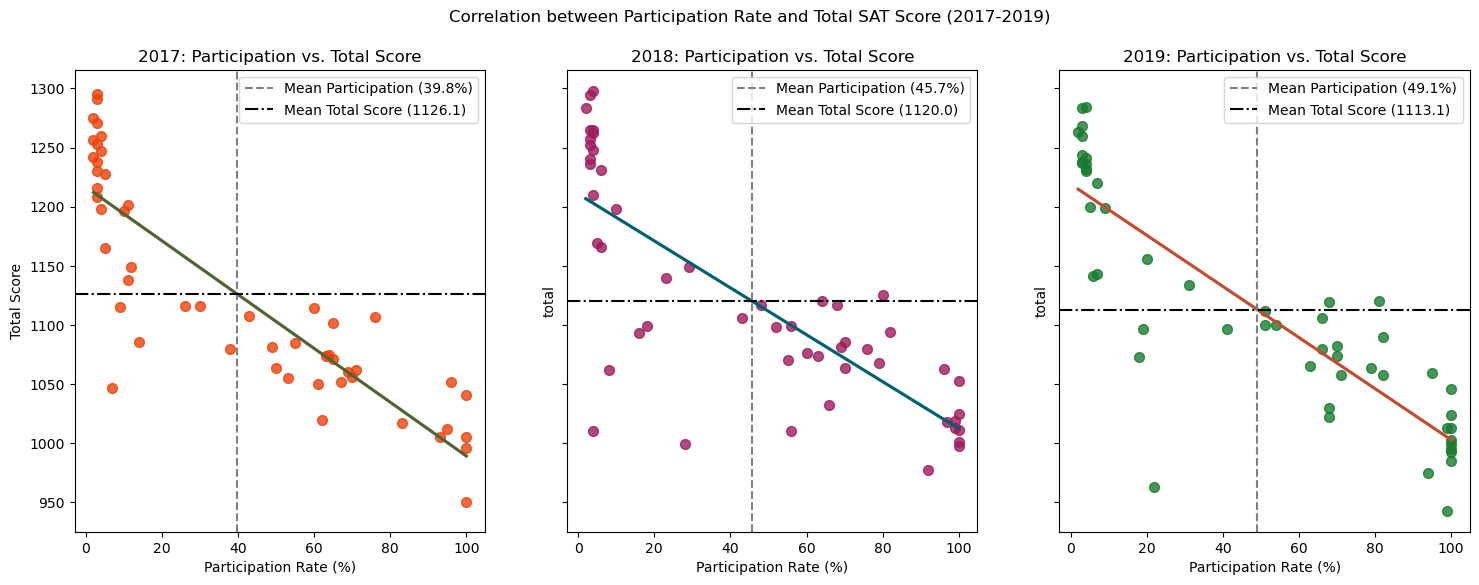

In [177]:
# Scatter plot with trendline for each year
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plotting each year's data with a regression line for correlation analysis
# Changed 'Participation' to 'participation' to match the column name in your DataFrames
sns.regplot(ax=axes[0], x=sat_2017['participation'], y=sat_2017['total'], ci=None, scatter_kws={'s': 50}, line_kws={"color": "#506432"}, color='#EC410B')
axes[0].set_title('2017: Participation vs. Total Score')
axes[0].set_xlabel('Participation Rate (%)')
axes[0].set_ylabel('Total Score')
# Plot mean participation and total SAT score as horizontal and vertical lines
axes[0].axvline(mean_participation_2017, color='grey', linestyle='--', label=f'Mean Participation ({mean_participation_2017:.1f}%)')
axes[0].axhline(mean_total_score_2017, color='black', linestyle='-.', label=f'Mean Total Score ({mean_total_score_2017:.1f})')
axes[0].legend()

# Changed 'Participation' to 'participation' to match the column name in your DataFrames
sns.regplot(ax=axes[1], x=sat_2018['participation'], y=sat_2018['total'], ci=None, scatter_kws={'s': 50}, line_kws={"color": "#006072"}, color='#9E1C5C')
axes[1].set_title('2018: Participation vs. Total Score')
axes[1].set_xlabel('Participation Rate (%)')
# Plot mean participation and total SAT score as horizontal and vertical lines
axes[1].axvline(mean_participation_2018, color='grey', linestyle='--', label=f'Mean Participation ({mean_participation_2018:.1f}%)')
axes[1].axhline(mean_total_score_2018, color='black', linestyle='-.', label=f'Mean Total Score ({mean_total_score_2018:.1f})')
axes[1].legend()


# Changed 'Participation' to 'participation' to match the column name in your DataFrames
sns.regplot(ax=axes[2], x=sat_2019['participation'], y=sat_2019['total'], ci=None, scatter_kws={'s': 50}, line_kws={"color": "#C14C32"},color='#187B30')
axes[2].set_title('2019: Participation vs. Total Score')
axes[2].set_xlabel('Participation Rate (%)')
# Plot mean participation and total SAT score as horizontal and vertical lines
axes[2].axvline(mean_participation_2019, color='grey', linestyle='--', label=f'Mean Participation ({mean_participation_2019:.1f}%)')
axes[2].axhline(mean_total_score_2019, color='black', linestyle='-.', label=f'Mean Total Score ({mean_total_score_2019:.1f})')
axes[2].legend()

plt.suptitle('Correlation between Participation Rate and Total SAT Score (2017-2019)')

# Save the plot as a high-resolution image
plt.savefig('Scatter plot.jpg')
plt.show()

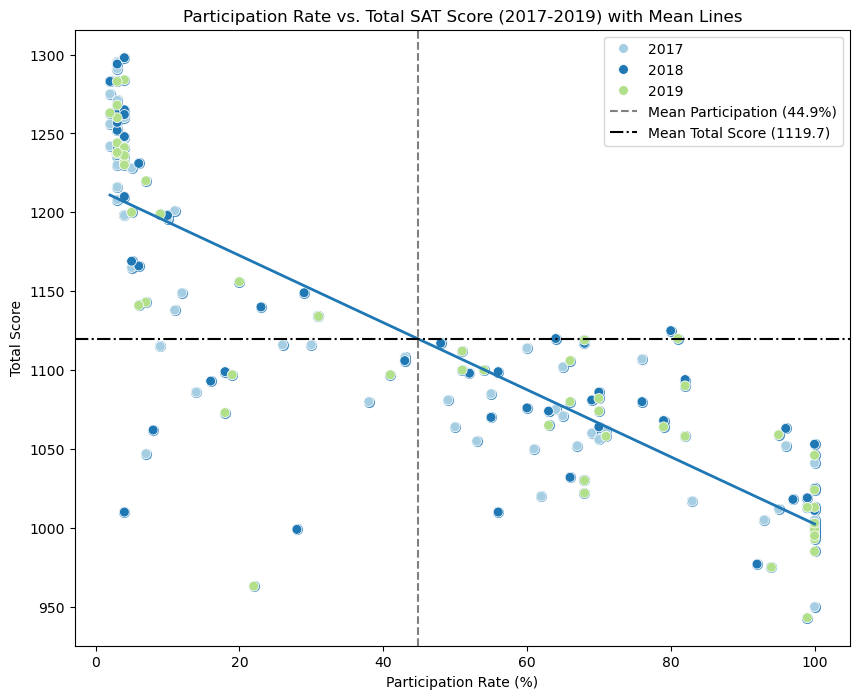

In [179]:
# Create scatter plot with trendlines for each year and add mean markers
plt.figure(figsize=(10, 8))

# Scatter plot with trendline for each year
# Changed 'Participation' to 'participation' to match the column name in your DataFrame
sns.regplot(data=sat_combined, x='participation', y='total', ci=None, scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={"lw": 2})
# Changed 'Participation' to 'participation' to match the column name in your DataFrame
sns.scatterplot(data=sat_combined, x='participation', y='total', hue='year', palette='Paired', s=50)

# Plot mean participation and total SAT score as horizontal and vertical lines
plt.axvline(mean_participation_sat_combined, color='grey', linestyle='--', label=f'Mean Participation ({mean_participation_sat_combined:.1f}%)')
plt.axhline(mean_total_sat_combined, color='black', linestyle='-.', label=f'Mean Total Score ({mean_total_sat_combined:.1f})')

# Add titles and labels
plt.title('Participation Rate vs. Total SAT Score (2017-2019) with Mean Lines')
plt.xlabel('Participation Rate (%)')
plt.ylabel('Total Score')
plt.legend()

# Save the plot as a high-resolution image
plt.savefig('Scatter plot all.jpg')
plt.show()

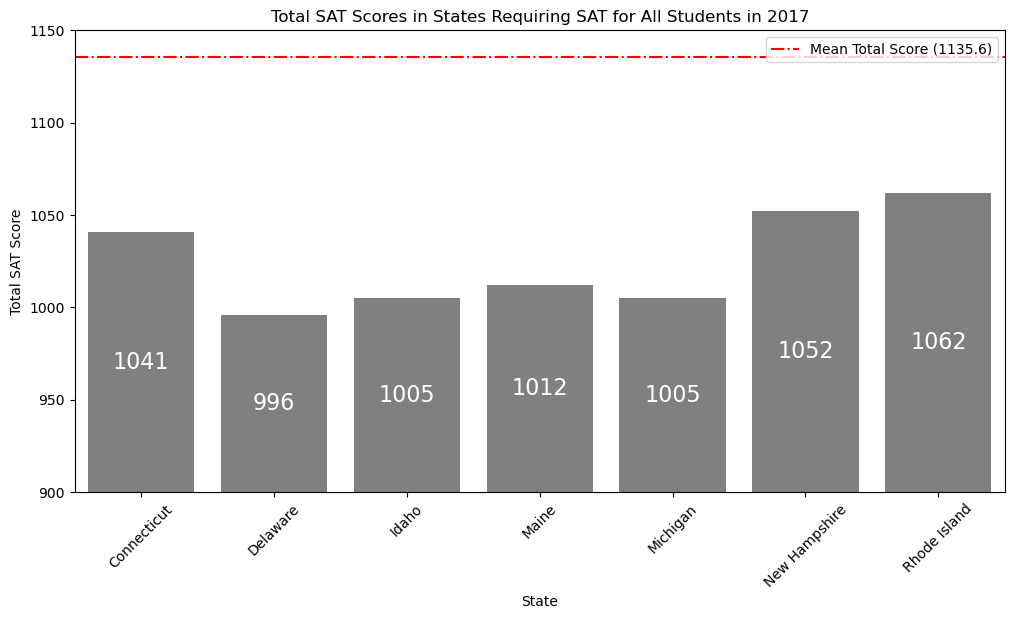

In [181]:
# Define the list of states where the SAT is required
excluded_states = ['Connecticut', 'Delaware', 'Idaho', 'Maine', 'Michigan', 'New Hampshire', 'Rhode Island']

# Filter the dataset to include only non-required SAT states
not_required_states = sat_combined[~sat_combined['state'].isin(excluded_states)]

# Calculate the mean total SAT score for states where the SAT is **not** required.
# Use not_required_states instead of excluded_states, and access the 'total' column
mean_total_score_not_required = not_required_states['total'].mean() 

# Create a bar plot for total SAT scores for states where the SAT is required.
plt.figure(figsize=(12, 6))
bars = sns.barplot(data=required_data_2017, x='state', y='total', color='grey')

# Title, mean line, and y-axis starting at 900
plt.title('Total SAT Scores in States Requiring SAT for All Students in 2017')
plt.axhline(mean_total_score_not_required, color='Red', linestyle='-.', label=f'Mean Total Score ({mean_total_score_not_required:.1f})')
plt.xlabel('State')
plt.ylabel('Total SAT Score')

# Set y-axis limits, ensuring upper limit is at least 1150 (1100 + 50)
upper_limit = max(required_data_2017['total'].max(), 1100) + 50  
plt.ylim(900, upper_limit)  

# Add y-axis values centered and in white
bars.bar_label(bars.containers[0], label_type='center', color='white', fontsize=16)

# Rotate x-tick labels and position the legend in the top right
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Save the plot as a high-resolution image
plt.savefig('Total SAT Score bar requires all.jpg', bbox_inches='tight')
plt.show() 

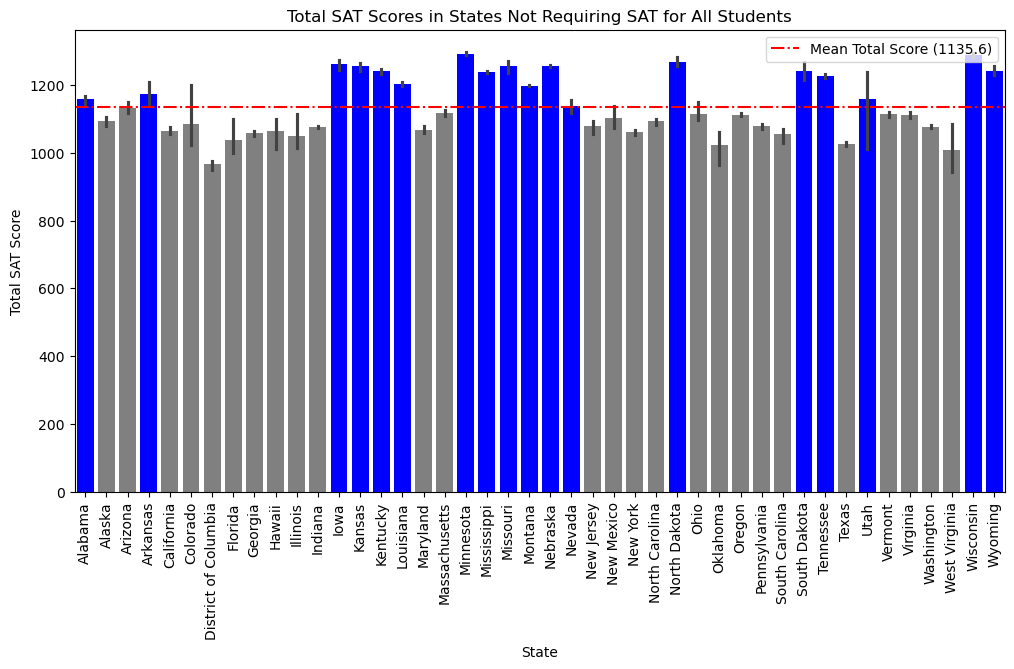

In [183]:
# Define the list of states where the SAT is required
excluded_states = ['Connecticut', 'Delaware', 'Idaho', 'Maine', 'Michigan', 'New Hampshire', 'Rhode Island']

# Filter the dataset to include only non-required SAT states
not_required_states = sat_combined[~sat_combined['state'].isin(excluded_states)]

# Calculate the mean total SAT score for non-required states
mean_total_score_not_required = not_required_states['total'].mean()

# Create a bar plot with conditional coloring
plt.figure(figsize=(12, 6))
bars = sns.barplot(data=not_required_states, x='state', y='total', estimator=np.mean)

# Set colors for bars based on whether the score is below or above the mean
for bar, score in zip(bars.patches, not_required_states.groupby('state')['total'].mean()):
    color = 'grey' if score < mean_total_score_not_required else 'blue'
    bar.set_facecolor(color)

# Add mean line and set legend in the top right
plt.axhline(mean_total_score_not_required, color='red', linestyle='-.', label=f'Mean Total Score ({mean_total_score_not_required:.1f})')
plt.title('Total SAT Scores in States Not Requiring SAT for All Students')
plt.xlabel('State')
plt.ylabel('Total SAT Score')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

# Save the plot as a high-resolution image
plt.savefig('Total SAT Score bar all.jpg', bbox_inches='tight')
plt.show()